In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
prod = pd.read_csv('../data/GDP_per_quarter.csv')
productivity = pd.DataFrame(prod)
productivity.drop(index = [3,10,16],inplace=True)

inf = pd.read_csv('../data/Quarterly_infilation.csv')
infilation = pd.DataFrame(inf)
infilation =infilation.drop(['SUBJECT', 'MEASURE','FREQUENCY','Flag Codes'], axis=1)



In [3]:
productivity.reset_index(inplace=True)
productivity

,index,Country,2021-Q4,2021-Q3,2021-Q2,2021-Q1,2020-Q4,2020-Q3,2020-Q2,2020-Q1,...,2002-Q2,2002-Q1,2001-Q4,2001-Q3,2001-Q2,2001-Q1,2000-Q4,2000-Q3,2000-Q2,2000-Q1
0,0,Slovakia,NaN,NaN,NaN,NaN,NaN,2.180855e+10,1.953442e+10,2.130274e+10,...,1.155564e+10,1.143982e+10,1.140442e+10,1.116490e+10,1.111826e+10,1.100148e+10,1.092408e+10,1.086316e+10,1.079898e+10,1.069456e+10
1,1,Austria,9.241863e+10,9.377876e+10,9.070556e+10,8.715757e+10,8.750030e+10,8.917405e+10,8.047778e+10,9.086087e+10,...,7.206637e+10,7.170129e+10,7.109538e+10,7.069148e+10,7.065559e+10,7.082965e+10,7.107146e+10,6.996467e+10,6.965500e+10,6.922582e+10
2,2,Belgium,1.136930e+11,1.131120e+11,1.108510e+11,1.089670e+11,1.076290e+11,1.077780e+11,9.633100e+10,1.090200e+11,...,8.460400e+10,8.388600e+10,8.317100e+10,8.325400e+10,8.341300e+10,8.339800e+10,8.335100e+10,8.254400e+10,8.216300e+10,8.157600e+10
3,4,Germany,8.034510e+11,8.062500e+11,7.930100e+11,7.761400e+11,7.894350e+11,7.836100e+11,7.186240e+11,7.984380e+11,...,6.487370e+11,6.458620e+11,6.492670e+11,6.500230e+11,6.510830e+11,6.514610e+11,6.386190e+11,6.405860e+11,6.407370e+11,6.355170e+11
4,5,Estonia,6.569154e+09,6.455124e+09,6.389617e+09,6.238700e+09,6.037598e+09,5.907816e+09,5.701474e+09,6.053237e+09,...,3.534022e+09,3.414611e+09,3.390976e+09,3.341946e+09,3.274328e+09,3.270264e+09,3.223752e+09,3.152816e+09,3.114389e+09,3.038302e+09
5,6,Spain,2.880450e+11,2.823650e+11,2.751290e+11,2.718860e+11,2.737190e+11,2.731110e+11,2.338310e+11,2.839550e+11,...,2.329420e+11,2.310590e+11,2.300800e+11,2.284990e+11,2.263890e+11,2.247280e+11,2.223670e+11,2.200990e+11,2.177490e+11,2.150560e+11
6,7,Finland,5.888300e+10,5.847100e+10,5.789500e+10,5.686400e+10,5.693500e+10,5.641300e+10,5.372100e+10,5.724900e+10,...,4.614800e+10,4.569600e+10,4.539900e+10,4.552700e+10,4.524100e+10,4.518700e+10,4.496700e+10,4.449400e+10,4.380800e+10,4.347300e+10
7,8,France,5.946380e+11,5.904640e+11,5.725200e+11,5.650850e+11,5.641260e+11,5.703250e+11,4.809560e+11,5.557900e+11,...,4.754990e+11,4.733170e+11,4.715550e+11,4.714330e+11,4.701620e+11,4.692930e+11,4.667350e+11,4.629730e+11,4.600970e+11,4.555980e+11
8,9,Greece,4.584950e+10,4.565604e+10,4.476764e+10,4.432106e+10,4.258747e+10,4.097389e+10,3.888867e+10,4.493059e+10,...,4.931402e+10,4.823439e+10,4.784349e+10,4.771708e+10,4.695564e+10,4.707973e+10,4.650407e+10,4.585344e+10,4.501243e+10,4.460121e+10
9,11,Ireland,9.870866e+10,1.043020e+11,1.030240e+11,9.847247e+10,8.973704e+10,9.370313e+10,8.532482e+10,8.799766e+10,...,3.945551e+10,3.916320e+10,3.808159e+10,3.750901e+10,3.781426e+10,3.718079e+10,3.625790e+10,3.616305e+10,3.557843e+10,3.441913e+10


In [4]:
infilation

,LOCATION,INDICATOR,TIME,Value
0,AUT,CPI,2000-Q1,1.576597
1,AUT,CPI,2000-Q2,2.111587
2,AUT,CPI,2000-Q3,2.858183
3,AUT,CPI,2000-Q4,2.828739
4,AUT,CPI,2001-Q1,2.780696
...,...,...,...,...
2283,LTU,CPI,2020-Q4,0.527013
2284,LTU,CPI,2021-Q1,0.833219
2285,LTU,CPI,2021-Q2,3.235482
2286,LTU,CPI,2021-Q3,5.414587


In [5]:
infilation = infilation.pivot_table('Value', ['LOCATION', 'INDICATOR'], 'TIME')

infilation.index
#productivity.columns[88]

MultiIndex([('AUT', 'CPI'),
            ('BEL', 'CPI'),
            ('CHE', 'CPI'),
            ('CZE', 'CPI'),
            ('DEU', 'CPI'),
            ('DNK', 'CPI'),
            ('ESP', 'CPI'),
            ('EST', 'CPI'),
            ('FIN', 'CPI'),
            ('FRA', 'CPI'),
            ('GBR', 'CPI'),
            ('GRC', 'CPI'),
            ('HUN', 'CPI'),
            ('IRL', 'CPI'),
            ('ISL', 'CPI'),
            ('ITA', 'CPI'),
            ('LTU', 'CPI'),
            ('LUX', 'CPI'),
            ('LVA', 'CPI'),
            ('NLD', 'CPI'),
            ('NOR', 'CPI'),
            ('POL', 'CPI'),
            ('PRT', 'CPI'),
            ('SVK', 'CPI'),
            ('SVN', 'CPI'),
            ('SWE', 'CPI')],
           names=['LOCATION', 'INDICATOR'])

In [6]:
#infilation = infilation.set_index('LOCATION')
infilation.drop(index = [('GBR', 'CPI'),('CHE', 'CPI'),('CZE', 'CPI'),('DNK', 'CPI'),('HUN', 'CPI'),('ISL', 'CPI'),('NOR', 'CPI'),('POL', 'CPI'),('SWE', 'CPI')],inplace=True)
infilation

,TIME,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
LOCATION,INDICATOR,,,,,,,,,,,,,,,,,,,,,
AUT,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,1.785135,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
BEL,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,1.343232,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
DEU,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,1.294745,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
ESP,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,3.425096,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
EST,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,4.175705,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
FIN,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,1.388619,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865
FRA,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,2.151830,1.624719,...,1.004443,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014
GRC,CPI,2.896220,2.676672,2.958860,4.059900,3.316133,3.685659,3.771161,2.737990,3.959987,3.509493,...,-0.065996,0.093175,0.360482,-1.382770,-1.900200,-2.051077,-1.623779,0.291040,1.815497,4.448262
IRL,CPI,4.331271,5.213716,6.214953,6.567993,5.337591,5.491071,4.619446,4.079861,4.807276,4.570461,...,0.687173,1.020408,1.021080,-0.325521,-0.844979,-1.173020,-0.195631,1.436969,2.917076,5.308276


In [7]:
productivity['Average_Productivity'] = productivity.iloc[:,1:88].mean(axis=1,skipna=True)
productivity

/var/folders/2k/j21zjx350njdf7pt9pvz2js40000gn/T/ipykernel_7130/1524133800.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  productivity['Average_Productivity'] = productivity.iloc[:,1:88].mean(axis=1,skipna=True)


,index,Country,2021-Q4,2021-Q3,2021-Q2,2021-Q1,2020-Q4,2020-Q3,2020-Q2,2020-Q1,...,2002-Q1,2001-Q4,2001-Q3,2001-Q2,2001-Q1,2000-Q4,2000-Q3,2000-Q2,2000-Q1,Average_Productivity
0,0,Slovakia,NaN,NaN,NaN,NaN,NaN,2.180855e+10,1.953442e+10,2.130274e+10,...,1.143982e+10,1.140442e+10,1.116490e+10,1.111826e+10,1.100148e+10,1.092408e+10,1.086316e+10,1.079898e+10,1.069456e+10,1.707762e+10
1,1,Austria,9.241863e+10,9.377876e+10,9.070556e+10,8.715757e+10,8.750030e+10,8.917405e+10,8.047778e+10,9.086087e+10,...,7.170129e+10,7.109538e+10,7.069148e+10,7.065559e+10,7.082965e+10,7.107146e+10,6.996467e+10,6.965500e+10,6.922582e+10,8.246088e+10
2,2,Belgium,1.136930e+11,1.131120e+11,1.108510e+11,1.089670e+11,1.076290e+11,1.077780e+11,9.633100e+10,1.090200e+11,...,8.388600e+10,8.317100e+10,8.325400e+10,8.341300e+10,8.339800e+10,8.335100e+10,8.254400e+10,8.216300e+10,8.157600e+10,9.813206e+10
3,4,Germany,8.034510e+11,8.062500e+11,7.930100e+11,7.761400e+11,7.894350e+11,7.836100e+11,7.186240e+11,7.984380e+11,...,6.458620e+11,6.492670e+11,6.500230e+11,6.510830e+11,6.514610e+11,6.386190e+11,6.405860e+11,6.407370e+11,6.355170e+11,7.187445e+11
4,5,Estonia,6.569154e+09,6.455124e+09,6.389617e+09,6.238700e+09,6.037598e+09,5.907816e+09,5.701474e+09,6.053237e+09,...,3.414611e+09,3.390976e+09,3.341946e+09,3.274328e+09,3.270264e+09,3.223752e+09,3.152816e+09,3.114389e+09,3.038302e+09,4.861703e+09
5,6,Spain,2.880450e+11,2.823650e+11,2.751290e+11,2.718860e+11,2.737190e+11,2.731110e+11,2.338310e+11,2.839550e+11,...,2.310590e+11,2.300800e+11,2.284990e+11,2.263890e+11,2.247280e+11,2.223670e+11,2.200990e+11,2.177490e+11,2.150560e+11,2.648005e+11
6,7,Finland,5.888300e+10,5.847100e+10,5.789500e+10,5.686400e+10,5.693500e+10,5.641300e+10,5.372100e+10,5.724900e+10,...,4.569600e+10,4.539900e+10,4.552700e+10,4.524100e+10,4.518700e+10,4.496700e+10,4.449400e+10,4.380800e+10,4.347300e+10,5.258447e+10
7,8,France,5.946380e+11,5.904640e+11,5.725200e+11,5.650850e+11,5.641260e+11,5.703250e+11,4.809560e+11,5.557900e+11,...,4.733170e+11,4.715550e+11,4.714330e+11,4.701620e+11,4.692930e+11,4.667350e+11,4.629730e+11,4.600970e+11,4.555980e+11,5.288788e+11
8,9,Greece,4.584950e+10,4.565604e+10,4.476764e+10,4.432106e+10,4.258747e+10,4.097389e+10,3.888867e+10,4.493059e+10,...,4.823439e+10,4.784349e+10,4.771708e+10,4.695564e+10,4.707973e+10,4.650407e+10,4.585344e+10,4.501243e+10,4.460121e+10,4.945154e+10
9,11,Ireland,9.870866e+10,1.043020e+11,1.030240e+11,9.847247e+10,8.973704e+10,9.370313e+10,8.532482e+10,8.799766e+10,...,3.916320e+10,3.808159e+10,3.750901e+10,3.781426e+10,3.718079e+10,3.625790e+10,3.616305e+10,3.557843e+10,3.441913e+10,5.708960e+10


In [8]:
infilation['Average_Infilation'] = infilation.iloc[:,0:87].mean(axis=1,skipna=True)
infilation

,TIME,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
LOCATION,INDICATOR,,,,,,,,,,,,,,,,,,,,,
AUT,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,1.785135,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.911823
BEL,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,1.343232,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.896968
DEU,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,1.294745,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.453204
ESP,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,3.425096,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.990871
EST,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,4.175705,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,3.146958
FIN,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,1.388619,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.453124
FRA,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,2.151830,1.624719,...,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014,1.375295
GRC,CPI,2.896220,2.676672,2.958860,4.059900,3.316133,3.685659,3.771161,2.737990,3.959987,3.509493,...,0.093175,0.360482,-1.382770,-1.900200,-2.051077,-1.623779,0.291040,1.815497,4.448262,1.712138
IRL,CPI,4.331271,5.213716,6.214953,6.567993,5.337591,5.491071,4.619446,4.079861,4.807276,4.570461,...,1.020408,1.021080,-0.325521,-0.844979,-1.173020,-0.195631,1.436969,2.917076,5.308276,1.741659


In [9]:
infilation.reset_index(inplace=True)

0.04725529966859221


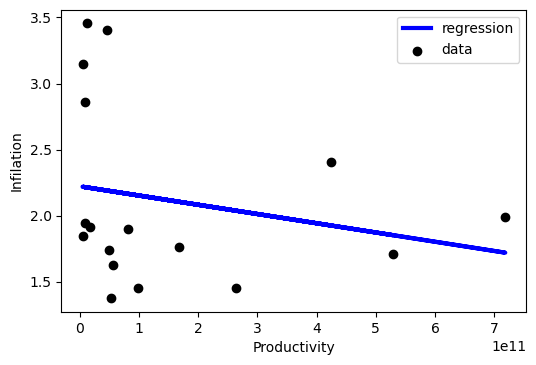

In [10]:
import matplotlib.pyplot as plt

x=productivity.loc[:,'Average_Productivity'].values
y=infilation.loc[:,'Average_Infilation'].values

x = x.reshape(len(productivity), 1)
y = y.reshape(len(infilation), 1)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))


fig, ax = plt.subplots(dpi=100, figsize=(6, 4))
fig.patch.set_facecolor('white')
ax.scatter(x, y,  color='black', label='data')
ax.plot(x, regr.predict(x), color='blue', linewidth=3, label='regression')

ax.set_xlabel('Productivity', fontsize=10)
ax.set_ylabel('Infilation', fontsize=10)

ax.legend()
plt.show()

In [11]:
correl_signif = pearsonr(productivity['Average_Productivity'], infilation['Average_Infilation'])
correl = correl_signif[0]
correl


-0.21738284124693952

In [12]:
corr1 = pd.DataFrame(productivity['Average_Productivity'])
corr1['Average_Infilation'] = infilation['Average_Infilation']
corr1

,Average_Productivity,Average_Infilation
0,1.707762e+10,1.911823
1,8.246088e+10,1.896968
2,9.813206e+10,1.453204
3,7.187445e+11,1.990871
4,4.861703e+09,3.146958
5,2.648005e+11,1.453124
6,5.258447e+10,1.375295
7,5.288788e+11,1.712138
8,4.945154e+10,1.741659
9,5.708960e+10,1.622336


In [13]:
column_2 = productivity['Average_Productivity']
column_1 = infilation['Average_Infilation']
correlation = column_1.corr(column_2)
correlation

-0.21738284124693955

In [14]:

df4 = productivity['Average_Productivity']

df5 = pd.DataFrame(df4)
df5.columns

Index(['Average_Productivity'], dtype='object')

In [15]:
df5['Average_Infilation'] = infilation['Average_Infilation']
corr1 = df5['Average_Productivity'].corr(df5['Average_Infilation'])
print(corr1)

-0.21738284124693957
